# Data Loading and Preprocessing

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your sales dataset (Ensure you have your dataset ready)
df = pd.read_excel('C:\\tableau\\Sales\\Sales Data.xls')

# Display the first few rows of the dataset
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [13]:

# Check for missing values
df.isnull().sum()

# Fill missing values
df.fillna(method='ffill', inplace=True)

# If there are categorical columns encode them
le = LabelEncoder()
df['Product Name'] = le.fit_transform(df['Product Name'])
df['Country/Region'] = le.fit_transform(df['Country/Region'])

# Verify the changes
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,1,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,1080,16.448,2,0.2,5.5512
1,2,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,1,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,707,3.540,2,0.8,-5.4870
2,3,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,1,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,217,11.784,3,0.2,4.2717
3,4,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,1,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,1363,272.736,3,0.2,-64.7748
4,5,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,1,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,250,19.536,3,0.2,4.8840


In [14]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

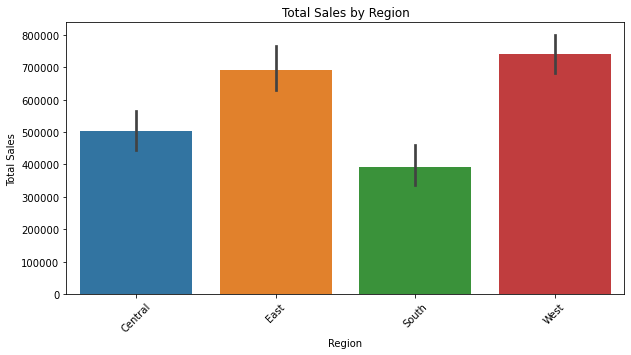

In [16]:
# Total Sales by Region
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

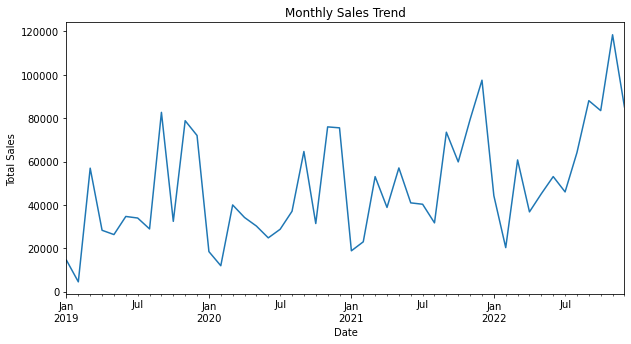

In [17]:
# Sales Trend Over Time
plt.figure(figsize=(10, 5))
df['Order Date'] = pd.to_datetime(df['Order Date'])  # Ensure date conversion
df.set_index('Order Date', inplace=True)  # Set date as index
df['Sales'].resample('M').sum().plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


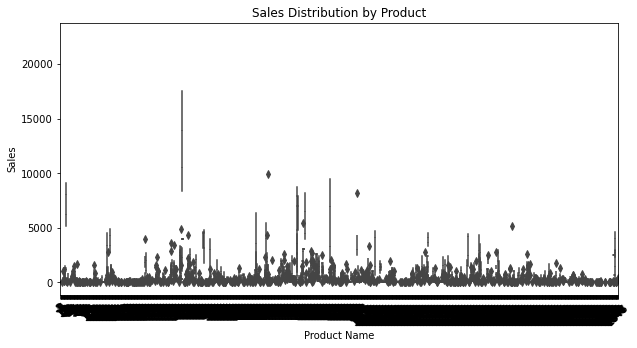

In [18]:
# Product-wise Sales Distribution
plt.figure(figsize=(10, 5))
sns.boxplot(x='Product Name', y='Sales', data=df)
plt.title('Sales Distribution by Product')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


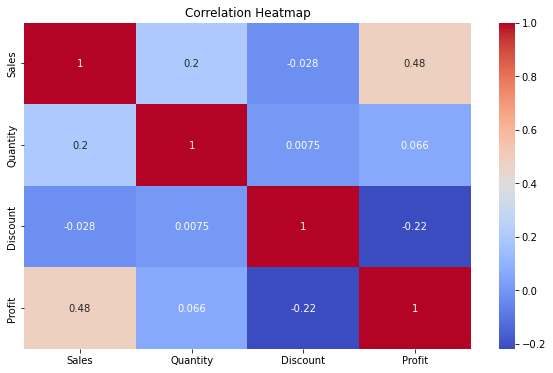

In [19]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
numeric_cols = df[['Sales', 'Quantity', 'Discount', 'Profit']]  # Include only numeric columns
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Sales Prediction Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Assuming df is already defined and contains the relevant columns

# Check the columns of the DataFrame
print("Columns in the DataFrame:", df.columns)

# Define features without 'Advertising'
features = ['Product Name', 'Region']  # Add any other relevant features here

# Convert categorical variables to dummy variables
X = pd.get_dummies(df[features], drop_first=True)  # Adjust names as necessary
y = df['Sales']  # Ensure this matches your sales column

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict sales
y_pred = lr.predict(X_test)

Columns in the DataFrame: Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country/Region', 'City', 'State/Province',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [32]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 445883.04466622666
R² Score: 0.0015750862748170613


In [33]:
# Compare actual vs predicted sales
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


             Actual   Predicted
Order Date                     
2021-12-12   18.693  201.365079
2020-11-21   18.176  252.643298
2021-06-27  539.658  215.776854
2021-12-03  772.680  232.772689
2022-12-22  839.430  192.634201


# Hyperparameter Tuning 

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# Assuming df is already defined and contains the relevant columns

# Check the columns of the DataFrame
print("Columns in the DataFrame:", df.columns)

# Define features (ensure they exist in your DataFrame)
features = ['Product Name', 'Region']  # Add any other relevant features
X = pd.get_dummies(df[features], drop_first=True)
y = df['Sales']  # Ensure this matches your sales column

# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


Columns in the DataFrame: Index(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country/Region', 'City', 'State/Province',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [38]:
# Grid search to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 100}


In [39]:
# Predict using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)


In [40]:
# Evaluate the model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
print(f'Improved Mean Squared Error: {mse_best}')
print(f'Improved R² Score: {r2_best}')


Improved Mean Squared Error: 191890.90837914633
Improved R² Score: 0.5703163286091915
